Paquetes necesarios

In [165]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA: Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

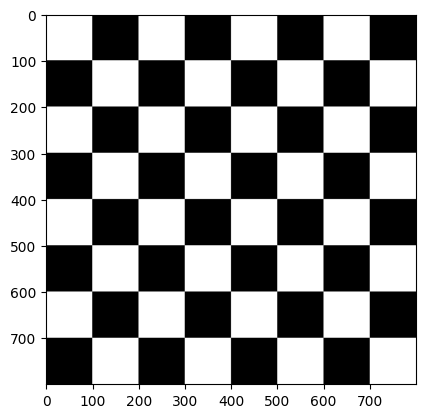

In [205]:
#Crea una imagen de un único plano, que se interpreta como nivel de gris (0 negro, 255 blanco)
gris_img = np.zeros((800,800,1), dtype = np.uint8)

#Recorremos el tablon del ajedrez
for columna in range(8):
    for fila in range(8):
    
        if (fila + columna) % 2 == 0:
            celda = 255     #Negro
        else:
            celda = 0   #Blanco

        gris_img[(fila * 100):(fila * 100) + 100,(columna * 100):(columna * 100) + 100,0] = celda

#Muestra la imagen con matplotlib
#Es necesario especificar que el mapa de color usado es de grises
plt.imshow(gris_img, cmap='gray')
plt.show()



TAREA: Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/ )

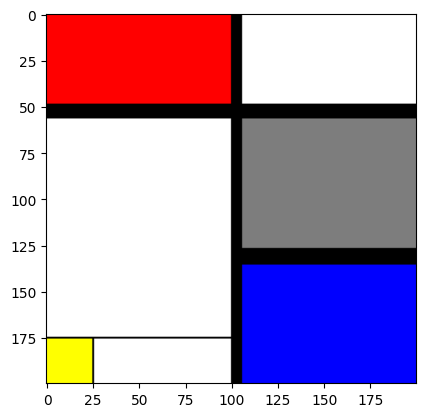

In [175]:
color_img = np.zeros((200,200,3), dtype = np.uint8)

#Lamina en blanco
color_img[:,:,0] = 255
color_img[:,:,1] = 255 
color_img[:,:,2] = 255


#Cuadrados de colores
for filas in range(0, 200):
    for columnas in range(0, 200):
        
        if filas < 50 and columnas < 100:
            color_img[:,:,0][filas,columnas] = 255
            color_img[:,:,1][filas,columnas] = 0
            color_img[:,:,2][filas,columnas] = 0 
        
        if filas > 55 and filas < 130 and columnas > 105:
            color_img[:,:,0][filas,columnas] = 125
            color_img[:,:,1][filas,columnas] = 125
            color_img[:,:,2][filas,columnas] = 125
            
        if filas > 175 and columnas < 25:
            color_img[:,:,0][filas,columnas] = 255
            color_img[:,:,1][filas,columnas] = 255
            color_img[:,:,2][filas,columnas] = 0
            
        if filas > 135 and columnas > 105:
            color_img[:,:,0][filas,columnas] = 0
            color_img[:,:,1][filas,columnas] = 0
            color_img[:,:,2][filas,columnas] = 255

#Lineas en negro            
for filas in range(0,200):
    for columnas in range(0,200):
        if columnas > 99 and columnas < 106:
            color_img[filas,columnas] = 0
        if filas > 48 and filas < 57:
            color_img[filas,columnas] = 0
        if filas > 126 and filas < 136 and columnas > 105:
            color_img[filas,columnas] = 0
        if filas > 174 and filas < 176 and columnas < 105:
            color_img[filas,columnas] = 0
        if filas > 174 and columnas > 24 and columnas < 26:
            color_img[filas,columnas] = 0

plt.imshow(color_img) 
plt.show()

TAREA: Resuelve una de las tareas previas (a elegir) con las funciones de dibujo de OpenCV  :)

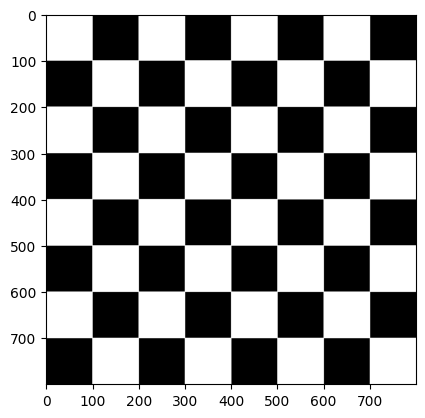

In [203]:
color_img2 = np.zeros((800,800,3), dtype = np.uint8)
for filas in range(8):
    for columnas in range(8):
        if ((filas + columnas) % 2) == 0: 
            cv2.rectangle(color_img2,(filas*100,columnas*100),((filas+1)*100,(columnas+1)*100),(255,255,255),-1)
plt.imshow(color_img2) 
plt.show()

TAREA: Modifica de forma libre los valores de un plano de la imagen

In [210]:
vid = cv2.VideoCapture(0)
  
while(True):      
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret:
        #Separamos canales
        
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]
        #Dimensiones
        h, w, c = frame.shape
        
        modified_b = b.copy()
        modified_b[0:h,0:w] = r - b

        #Concateamos en horizontal los tres planos del fotograma
        collage = np.hstack((r, g, modified_b))
    
        # Muestra fotograma redimensionando a la mitad para que quepa en pantalla
        cv2.imshow('Cam3', cv2.resize(collage, (int(w*1.5),int(h/2)),cv2.INTER_NEAREST))
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()

TAREA:
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 
¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [215]:
vid = cv2.VideoCapture(0)
  
while True:      
    
    ret, frame = vid.read()
    
    h, w, c = frame.shape

    r = frame[:, :, 0]
    g = frame[:, :, 1]
    b = frame[:, :, 2]
    
    maximo = 0
    
    #255 es el máximo para que sea blanco, luego 3 porque son 3 colores 
    # y 64 porque es una matriz de 8x8
    minimo = 255 * 3 * 64
    
    x_max = 0
    y_max = 0
    x_min = 0
    y_min = 0
    
    # Determinar zona 8x8 más clara y más oscura
    for i in range(0, h, 8):
        for j in range(0, w, 8):
            suma_rgb = r[i, j].sum() + g[i, j].sum() + b[i, j].sum()
            
            if suma_rgb > maximo:
                maximo = suma_rgb
                x_max = j  
                y_max = i
            if suma_rgb < minimo:
                minimo = suma_rgb
                x_min = j  
                y_min = i
                   
    cv2.circle(frame, (x_max, y_max), 8, (0, 0, 255), -1)   #Puntos claros
    cv2.circle(frame, (x_min, y_min), 8, (0, 255, 0), -1)   #Puntos oscuros
                
    cv2.imshow('Cam', frame)    
    
    # Detener el programa al presionar ESC
    if cv2.waitKey(20) == 27:
        break

# Liberar el objeto de captura
vid.release()
# Destruir ventanas
cv2.destroyAllWindows()

TAREA: Llevar a cabo una propuesta propia de pop art

In [226]:
vid = cv2.VideoCapture(0)

#Dimensiones de la cámara
w = int(vid.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(vid.get(cv2.CAP_PROP_FRAME_HEIGHT))

#Fuerzo a mitad de resolución para ocupar menos pantalla
w=int(w/3)
h=int(h/3)
vid.set(cv2.CAP_PROP_FRAME_WIDTH, w) #En Mac no reacciona a estos comandos
vid.set(cv2.CAP_PROP_FRAME_HEIGHT, h)

#Imagen conjunta 3x3 original
collage = np.zeros((h*3,w*3,3), dtype = np.uint8)

tl = collage[0:h,0:w]
tc = collage[0:h,w:w+w]
tr = collage [0:h, w+w: w+w+w]

bl = collage[h:h+h,0:w]
bc = collage[h:h+h,w:w+w]
br = collage[h:h+h,w+w:w+w+w]

gl = collage[h+h:h+h+h,0:w]
gc = collage[h+h:h+h+h,w:w+w]
gr = collage[h+h:h+h+h,w+w:w+w+w]

while True:      
    # fotograma a fotograma
    ret, frameIN = vid.read()

    #Menor tamaño
    frame = cv2.resize(frameIN, (w,h),cv2.INTER_NEAREST)

    if ret:
        #Separamos canales
        r = frame[:,:,2]
        g = frame[:,:,1]
        b = frame[:,:,0]

        #Jugamos
        tl[:,:,0] = b
        tl[:,:,1] = g
        tl[:,:,2] = r
        
        tc[:,:,0] = r 
        tc[:,:,1] = g
        tc[:,:,2] = b

        tr[:,:,0] = g
        tr[:,:,1] = r
        tr[:,:,2] = b
        
        bl[:,:,0] = r
        bl[:,:,1] = b
        bl[:,:,2] = g
        
        bc[:,:,0] = b
        bc[:,:,1] = r
        bc[:,:,2] = g 

        br[:,:,0] = g
        br[:,:,1] = b
        br[:,:,2] = r
        
        gl[:,:,0] = r
        gl[:,:,1] = b
        gl[:,:,2] = g
        
        gc[:,:,0] = b - 100
        gc[:,:,1] = g - 100
        gc[:,:,2] = r - 100
        
        gr[:,:,0] = b
        gr[:,:,1] = 0
        gr[:,:,2] = r
    
        # Muestra composicion
        cv2.imshow('Cam', collage)
    
    # Detenemos pulsado ESC
    if cv2.waitKey(20) == 27:
        break
  
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()